#Logistic Regression

Iris Dataset

In [1]:
import pandas as pd

In [28]:
data = pd.read_csv(r"/content/Iris Data.csv")

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [3]:
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


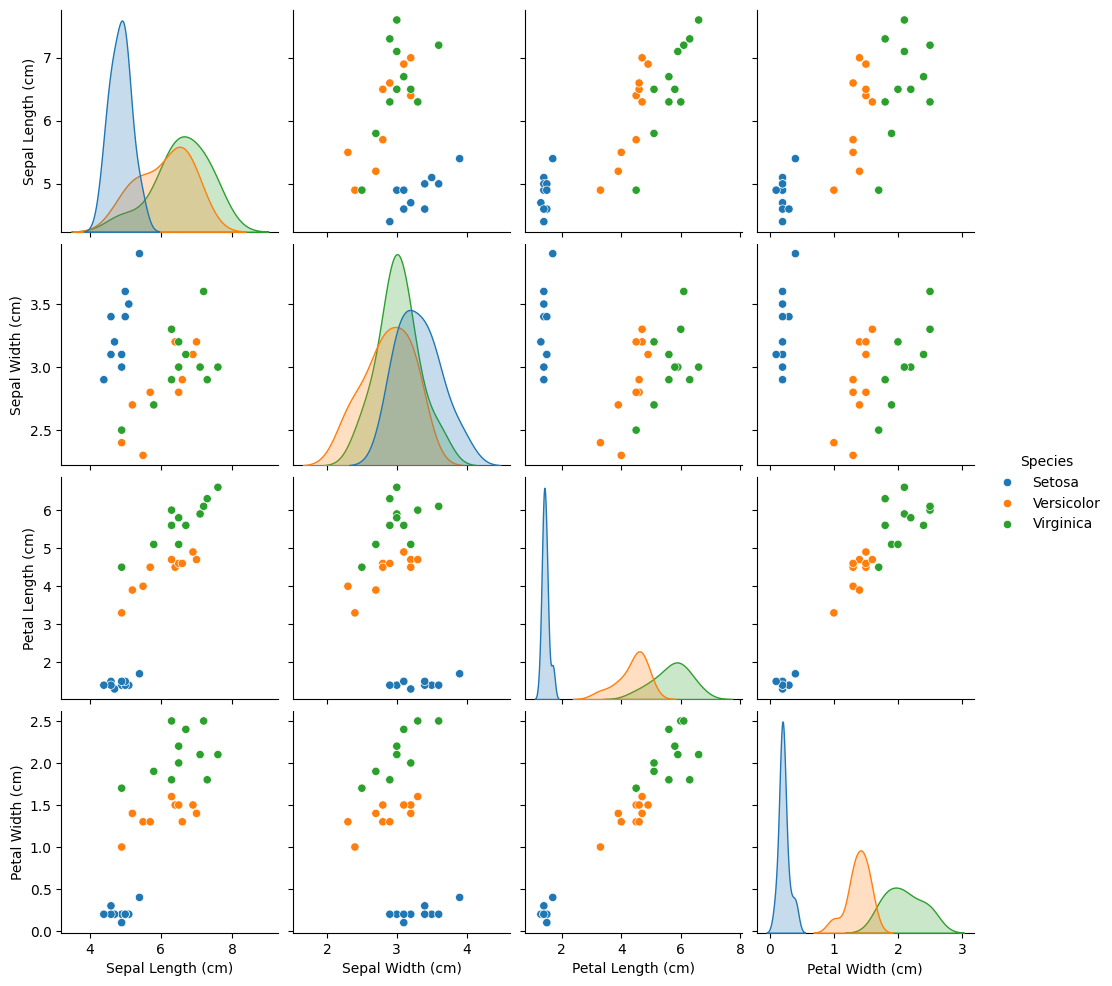

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(data, vars = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)'], hue = 'Species')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred = lg.predict(X_test_scaled)

In [18]:
print("Intercept: ", lg.intercept_)
print("Slope: ", lg.coef_)

Intercept:  [-0.55885025  1.01693991 -0.45808967]
Slope:  [[-0.68836708  0.54442457 -0.96016852 -0.95553442]
 [ 0.2504125  -0.21894346 -0.10167327 -0.33605663]
 [ 0.43795457 -0.32548111  1.06184179  1.29159105]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nAccuracy: \n", accuracy_score(y_test, y_pred))
print("\nClassification Report: ", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[4 0 0]
 [0 3 0]
 [0 1 2]]

Accuracy: 
 0.9

Classification Report:                precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         4
  Versicolor       0.75      1.00      0.86         3
   Virginica       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.92      0.89      0.89        10
weighted avg       0.93      0.90      0.90        10



In [37]:
class_labels = data['Species'].unique()

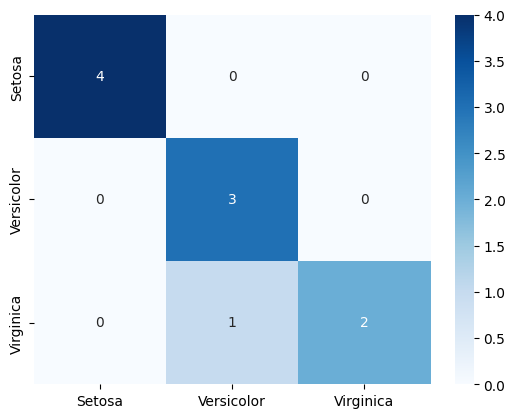

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
plt.show()